In [ ]:
import pandas as pd

readme = pd.read_csv("train_split_merged_data_updated.csv")

X = readme[["warengruppe", "Temperatur"]]
y = readme["umsatz"]

#dates
readme['date'] = pd.to_datetime(readme['date'])
readme = readme.drop(columns=['date'])


#excluding missing data
readme_clean = readme.dropna(subset=readme.columns)
X = readme_clean.drop(columns=["umsatz"])
y = readme_clean["umsatz"]

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print(predictions)

[376.62519236 365.90814081 355.19108926 344.47403771 333.75698616
 271.01891097 260.30185942 249.58480787 238.86775632 228.15070477
 311.74224673 301.02519518 290.30814363 279.59109208 268.87404053
 326.83853605 316.1214845  305.40443295 294.6873814  283.97032985
 306.20583584 295.48878429 284.77173274 274.05468119 263.33762964
 311.93698174 301.21993019 290.50287864 279.7858271  269.06877555
 257.3452797  246.62822815 235.91117661 225.19412506 214.47707351
 272.90552311 262.18847156 251.47142001 240.75436846 230.03731691
 306.31412715 295.5970756  284.88002405 274.1629725  263.44592095
 263.45675662 252.73970507 242.02265352 231.30560198 220.58855043
 271.37256882 260.65551727 249.93846572 239.22141417 228.50436262
 357.04799269 346.33094114 335.6138896  324.89683805 314.1797865
 271.03083008 260.31377853 249.59672698 238.87967544 228.16262389
 283.34640962 272.62935807 261.91230652 251.19525498 240.47820343
 285.12287376 274.40582221 263.68877067 252.97171912 242.25466757
 321.240501

[-4.09154283]
340.09234954888996
[376.62519236 365.90814081 355.19108926 344.47403771 333.75698616
 271.01891097 260.30185942 249.58480787 238.86775632 228.15070477
 311.74224673 301.02519518 290.30814363 279.59109208 268.87404053
 326.83853605 316.1214845  305.40443295 294.6873814  283.97032985
 306.20583584 295.48878429 284.77173274 274.05468119 263.33762964
 311.93698174 301.21993019 290.50287864 279.7858271  269.06877555
 257.3452797  246.62822815 235.91117661 225.19412506 214.47707351
 272.90552311 262.18847156 251.47142001 240.75436846 230.03731691
 306.31412715 295.5970756  284.88002405 274.1629725  263.44592095
 263.45675662 252.73970507 242.02265352 231.30560198 220.58855043
 271.37256882 260.65551727 249.93846572 239.22141417 228.50436262
 357.04799269 346.33094114 335.6138896  324.89683805 314.1797865
 271.03083008 260.31377853 249.59672698 238.87967544 228.16262389
 283.34640962 272.62935807 261.91230652 251.19525498 240.47820343
 285.12287376 274.40582221 263.68877067 252.

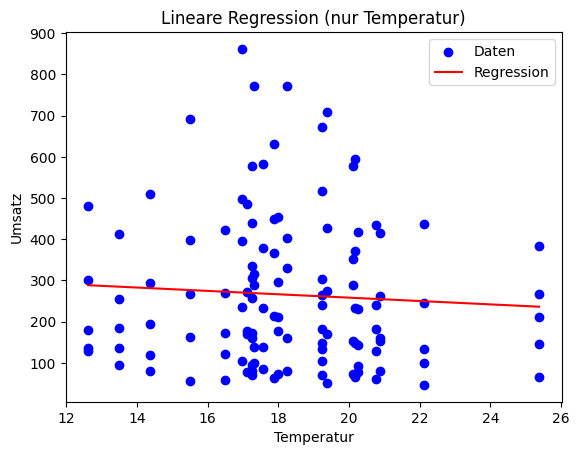

In [ ]:
readme_clean = readme.dropna(subset=readme.columns)

# Nur bestimmte Spalten verwenden
feature_cols = [col for col in readme_clean.columns if col.startswith("Temperatur") 
                or col.startswith("warengruppe_")]
X = readme_clean[feature_cols]
y = readme_clean["umsatz"]

model = LinearRegression()
model.fit(X, y)

print(model.coef_)
print(model.intercept_)
print(predictions)

# Visualisierung
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X_num = X['Temperatur'].values.reshape(-1, 1)
y_num = y.values

# Modell trainieren
model = LinearRegression()
model.fit(X_num, y_num)

# Linie fuer Plot
X_fit = np.linspace(min(X_num), max(X_num), 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

# Plot
plt.scatter(X_num, y_num, color='blue', label='Daten')
plt.plot(X_fit, y_fit, color='red', label='Regression')
plt.xlabel('Temperatur')
plt.ylabel('Umsatz')
plt.title('Lineare Regression (nur Temperatur)')
plt.legend()
plt.show()